# 04: Ensemble Methods

## Overview
This notebook covers advanced ensemble learning techniques that combine multiple models for better predictions.

## Topics Covered:
1. Bagging and Random Forest
2. Boosting (AdaBoost, Gradient Boosting)
3. XGBoost
4. LightGBM
5. Stacking and Blending
6. Voting Classifiers

## Main Focus Points:
- Understanding ensemble principles
- Differences between bagging and boosting
- When to use each ensemble method
- Handling overfitting in ensemble models

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print('Libraries imported successfully')

Libraries imported successfully


## 1. Random Forest (Bagging)

Random Forest Results:
Accuracy: 0.9000
Cross-validation score: 0.9062


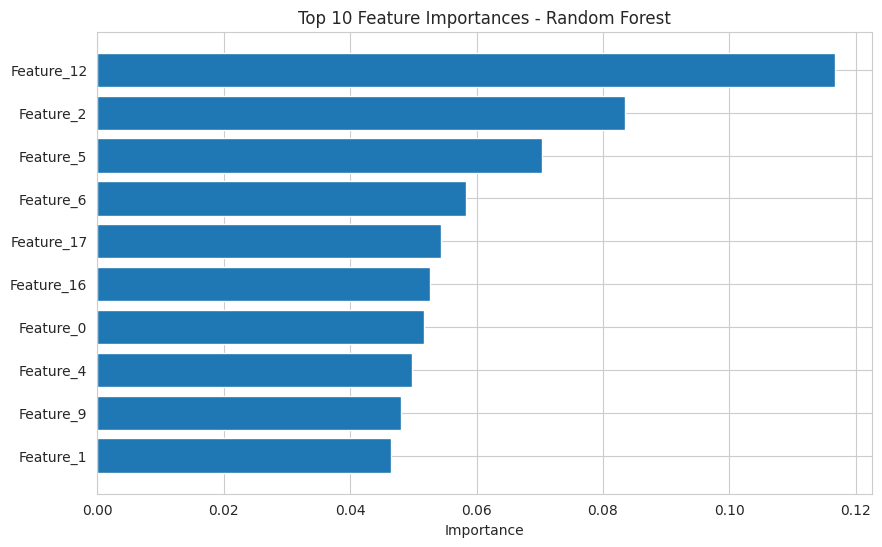

In [5]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Generate data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
                          n_redundant=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print('Random Forest Results:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}')
print(f'Cross-validation score: {cross_val_score(rf, X_train, y_train, cv=5).mean():.4f}')

# Feature importance
feature_importance = pd.DataFrame({
    'feature': [f'Feature_{i}' for i in range(20)],
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(range(10), feature_importance['importance'].head(10))
plt.yticks(range(10), feature_importance['feature'].head(10))
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances - Random Forest')
plt.gca().invert_yaxis()
plt.show()

## 2. AdaBoost

In [17]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost
ada = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

print('AdaBoost Results:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_ada):.4f}')
print(f'Cross-validation score: {cross_val_score(ada, X_train, y_train, cv=5).mean():.4f}')

AdaBoost Results:
Accuracy: 0.8200
Cross-validation score: 0.8000


## 3. Gradient Boosting

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, 
                               max_depth=3, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print('Gradient Boosting Results:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}')
print(f'Cross-validation score: {cross_val_score(gb, X_train, y_train, cv=5).mean():.4f}')

Gradient Boosting Results:
Accuracy: 0.9100
Cross-validation score: 0.8912


## 4. XGBoost

In [19]:
!pip install xgboost

In [20]:
# Note: Install xgboost if not available: pip install xgboost
try:
    import xgboost as xgb
    
    # XGBoost
    xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, 
                               max_depth=3, random_state=42, eval_metric='logloss')
    xgb_clf.fit(X_train, y_train)
    y_pred_xgb = xgb_clf.predict(X_test)
    
    print('XGBoost Results:')
    print(f'Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}')
    print(f'Cross-validation score: {cross_val_score(xgb_clf, X_train, y_train, cv=5).mean():.4f}')
except ImportError:
    print('XGBoost not installed. Install with: pip install xgboost')

XGBoost Results:
Accuracy: 0.9200
Cross-validation score: 0.8887


## 5. Voting Classifier

In [21]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Create individual classifiers
clf1 = LogisticRegression(random_state=42, max_iter=1000)
clf2 = RandomForestClassifier(n_estimators=50, random_state=42)
clf3 = SVC(kernel='rbf', probability=True, random_state=42)

# Hard voting
voting_hard = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('svm', clf3)], 
                              voting='hard')
voting_hard.fit(X_train, y_train)
y_pred_voting = voting_hard.predict(X_test)

print('Voting Classifier Results:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_voting):.4f}')

Voting Classifier Results:
Accuracy: 0.9000


## 6. Model Comparison


Ensemble Methods Comparison:
            Model  Accuracy
    Random Forest      0.90
         AdaBoost      0.82
Gradient Boosting      0.91
Voting Classifier      0.90
          XGBoost      0.92


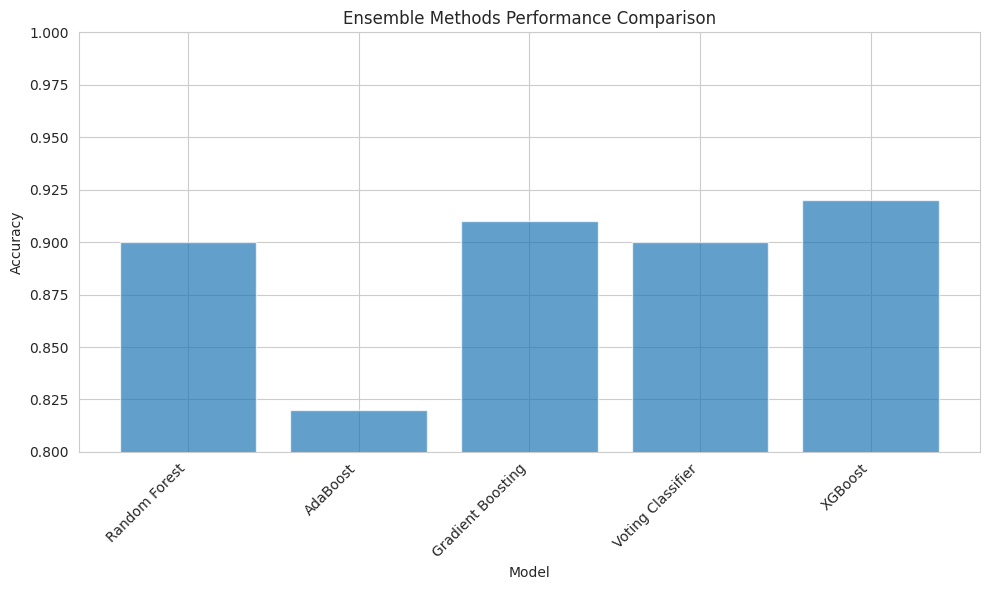

In [22]:
# Compare all ensemble methods
models = {
    'Random Forest': y_pred_rf,
    'AdaBoost': y_pred_ada,
    'Gradient Boosting': y_pred_gb,
    'Voting Classifier': y_pred_voting
}

try:
    y_pred_xgb = xgb_clf.predict(X_test)
    models['XGBoost'] = y_pred_xgb
except:
    pass

results = pd.DataFrame({
    'Model': models.keys(),
    'Accuracy': [accuracy_score(y_test, pred) for pred in models.values()]
})

print('\nEnsemble Methods Comparison:')
print(results.to_string(index=False))

# Visualize
plt.figure(figsize=(10, 6))
plt.bar(results['Model'], results['Accuracy'], alpha=0.7)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Ensemble Methods Performance Comparison')
plt.xticks(rotation=45, ha='right')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.show()

## Questions & Answers

### Q1: What's the difference between bagging and boosting?
**Answer:**
- **Bagging**: Trains models in parallel on random subsets of data, reduces variance
- **Boosting**: Trains models sequentially, each correcting previous errors, reduces bias
- Bagging example: Random Forest
- Boosting examples: AdaBoost, Gradient Boosting, XGBoost

### Q2: How does Random Forest prevent overfitting?
**Answer:**
1. Bootstrap sampling (random subsets of data)
2. Random feature selection at each split
3. Averaging predictions from multiple trees
4. Max depth and other regularization parameters

### Q3: What makes XGBoost better than Gradient Boosting?
**Answer:**
- Regularization to prevent overfitting
- Parallel processing for speed
- Handling of missing values
- Tree pruning using max_depth
- Built-in cross-validation

### Q4: When to use hard vs soft voting?
**Answer:**
- **Hard voting**: Majority vote (faster)
- **Soft voting**: Average probabilities (better when models have different strengths)
- Soft voting generally performs better but requires probability estimates

